# **Stock Price Prediction using Larger Batched LSTM**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-10-19 17:16:14.196198: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 17:16:14.332580: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 17:16:15.034083: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"]="0"

In [3]:
path = "AAPL.csv"
df = pd.read_csv(path , header = None)
df

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
...,...,...,...,...,...,...,...
2590,2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300
2591,2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000
2592,2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287979,108123900
2593,2022-06-17,130.070007,133.080002,129.809998,131.559998,130.779083,134520300


In [4]:
headers = ["Date","Open","High","Low","Close","Adj Close","Volume"]
filename = "AAPL.csv"
df = pd.read_csv(filename, names = headers )
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800


In [5]:
df.replace("null", np.nan, inplace = True)
df.head
missing_data = df.isnull()
missing_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print(" ")

Date
Date
False    2595
Name: count, dtype: int64
 
Open
Open
False    2595
Name: count, dtype: int64
 
High
High
False    2595
Name: count, dtype: int64
 
Low
Low
False    2595
Name: count, dtype: int64
 
Close
Close
False    2595
Name: count, dtype: int64
 
Adj Close
Adj Close
False    2595
Name: count, dtype: int64
 
Volume
Volume
False    2595
Name: count, dtype: int64
 


In [7]:
df.drop(0, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000
2,2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400
3,2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400
4,2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800
5,2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800


In [8]:
df[["Open","High","Low","Close","Adj Close","Volume"]] = df[["Open","High","Low","Close","Adj Close","Volume"]].astype("float")


In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-01,19.577499,19.578930,19.241785,19.445356,16.527443,683270000.0
2012-03-02,19.437143,19.528570,19.375713,19.470715,16.548992,431712400.0
2012-03-05,19.479286,19.552856,18.785713,19.041430,16.184122,809124400.0
2012-03-06,18.702143,19.060356,18.436428,18.937857,16.096092,810238800.0
2012-03-07,19.171429,19.206429,18.689285,18.953215,16.109144,798520800.0


In [10]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2012-03-01  19.577499  19.578930  19.241785  19.445356  16.527443  683270000.0
2012-03-02  19.437143  19.528570  19.375713  19.470715  16.548992  431712400.0
2012-03-05  19.479286  19.552856  18.785713  19.041430  16.184122  809124400.0
2012-03-06  18.702143  19.060356  18.436428  18.937857  16.096092  810238800.0
2012-03-07  19.171429  19.206429  18.689285  18.953215  16.109144  798520800.0
(2594, 6)


In [11]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


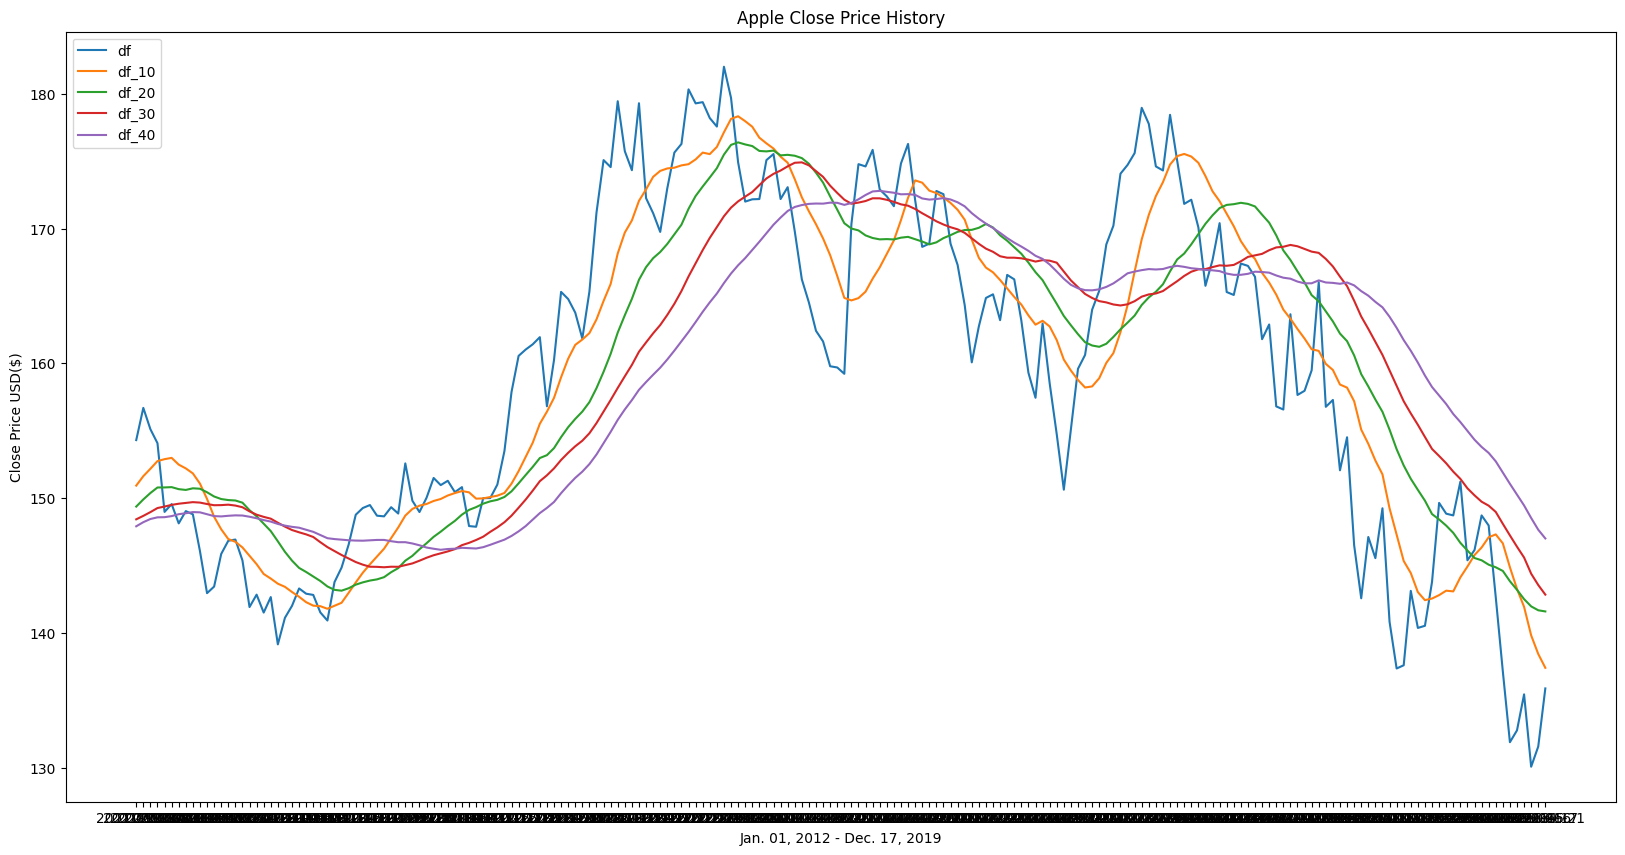

In [12]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [13]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-03-01,19.445356
2012-03-02,19.470715
2012-03-05,19.041430
2012-03-06,18.937857
2012-03-07,18.953215


In [14]:
dataset = data.values

In [15]:
import math
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
train, test = df[:training_data_len], df[training_data_len:]

In [16]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.03271316],
        [0.03286405],
        [0.03030974],
        ...,
        [0.69088881],
        [0.69981407],
        [0.72545927]]),
 (2594, 1))

In [17]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799,
       0.04660894, 0.044418  , 0.04847262, 0.0507443 , 0.04967964,
       0.05167084, 0.05221272, 0.0505573 , 0.05008129, 0.04935239,
       0.04562503, 0.04029114, 0.04657494, 0.04628593, 0.04184455,
       0.03877172, 0.0384997 , 0.03607289, 0.04663868, 0.04614992,
       0.04515114, 0.04110928, 0.04071615, 0.04153429, 0.04065027,
       0.03712905, 0.03802795, 0.03775169, 0.03796419, 0.03824894,
       0.0374393 , 0.03563512, 0.03456197, 0.0330553 , 0.02966372,
       0.02971896, 0.03628539, 0.0353695 , 0.03825746, 0.03714393])]
[0.036500023399033785]

[array([0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.0

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2016, 60, 1)

In [20]:
import tensorflow as tf

class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        attention_scores = tf.matmul(x, self.W) + self.b
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        return tf.reduce_sum(attention_weights * x, axis=1)

# Adding Attention Layer to the Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Attention())
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0020
Epoch 2/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.5205e-04
Epoch 3/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 6.0325e-04
Epoch 4/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.0431e-04
Epoch 5/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4.5159e-04


In [23]:

test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [24]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape

(518, 60)

In [25]:
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [26]:
# Extract the training data from the scaled dataset
train_data = scaled_data[:training_data_len, :]

# Create the datasets x_train and y_train
x_train = []
y_train = dataset[:training_data_len, :]  # Assuming y_train is taken from the same dataset

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])  # Use the last 60 time steps for input features

# Convert x_train to a NumPy array and reshape for LSTM input
x_train = np.array(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshape for LSTM [samples, time_steps, features]
x_train.shape
# y_train can be adjusted as needed, currently it is taken directly from the dataset
y_train = y_train[60:, 0]  # Assuming we want to predict the 'Close' price and aligning with x_train

lstm_train_predictions = model.predict(np.array(x_train))
lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [27]:
print(lstm_predictions[0:5], y_test[0:5])

[[62.965733]
 [63.209423]
 [63.520565]
 [63.766964]
 [64.0129  ]] [[80.834999]
 [81.279999]
 [80.580002]
 [82.875   ]
 [83.364998]]


In [28]:
mse = np.mean(lstm_predictions-y_test)**2
rmse = np.sqrt(np.mean(lstm_predictions-y_test)**2)
print(mse, rmse)

mse = np.mean(lstm_train_predictions-y_train)**2
rmse = np.sqrt(np.mean(lstm_train_predictions-y_train)**2)
print(mse, rmse)



2141.3720525961267 46.2749614002662
4.5183405395990075 2.125638854462114


/tmp/ipykernel_27330/3915802824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = lstm_predictions


<Figure size 640x480 with 0 Axes>

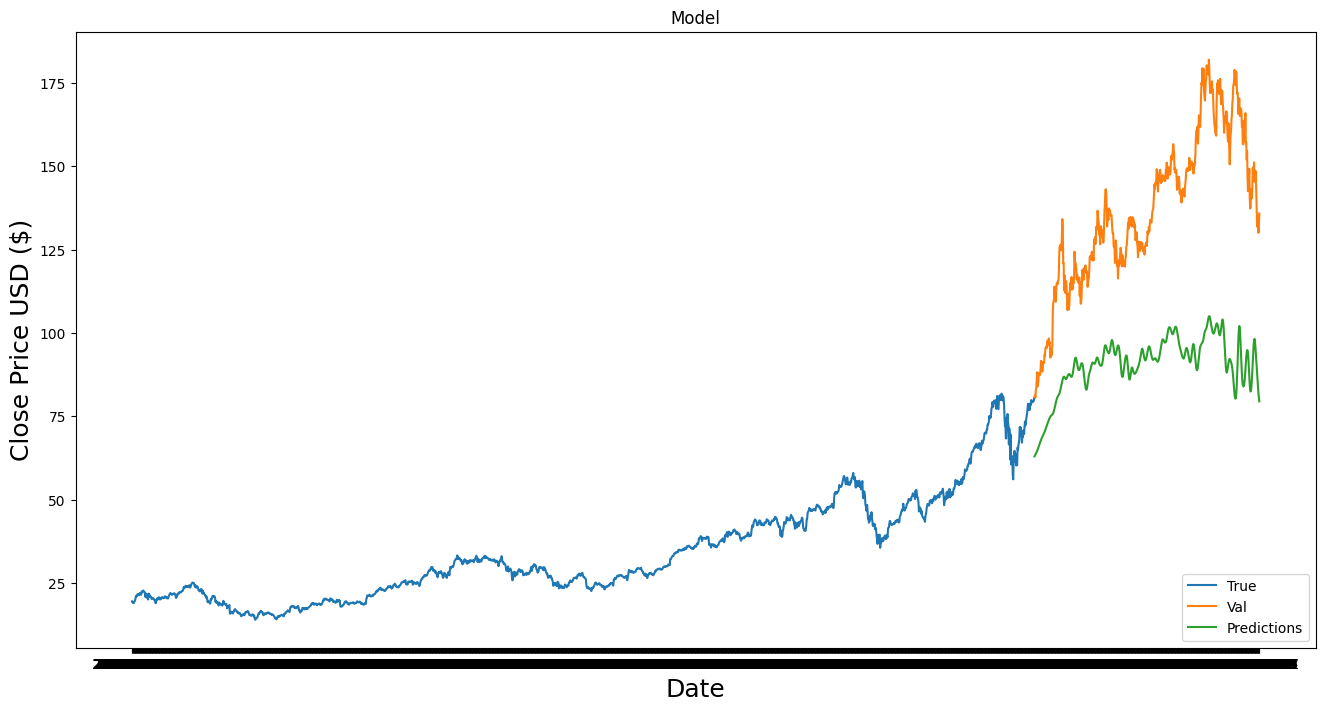

In [29]:
# Plot the data
plt.clf()
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = lstm_predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()
     

/tmp/ipykernel_27330/2305159978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = lstm_predictions
/tmp/ipykernel_27330/2305159978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predict['Predictions'] = lstm_train_predictions


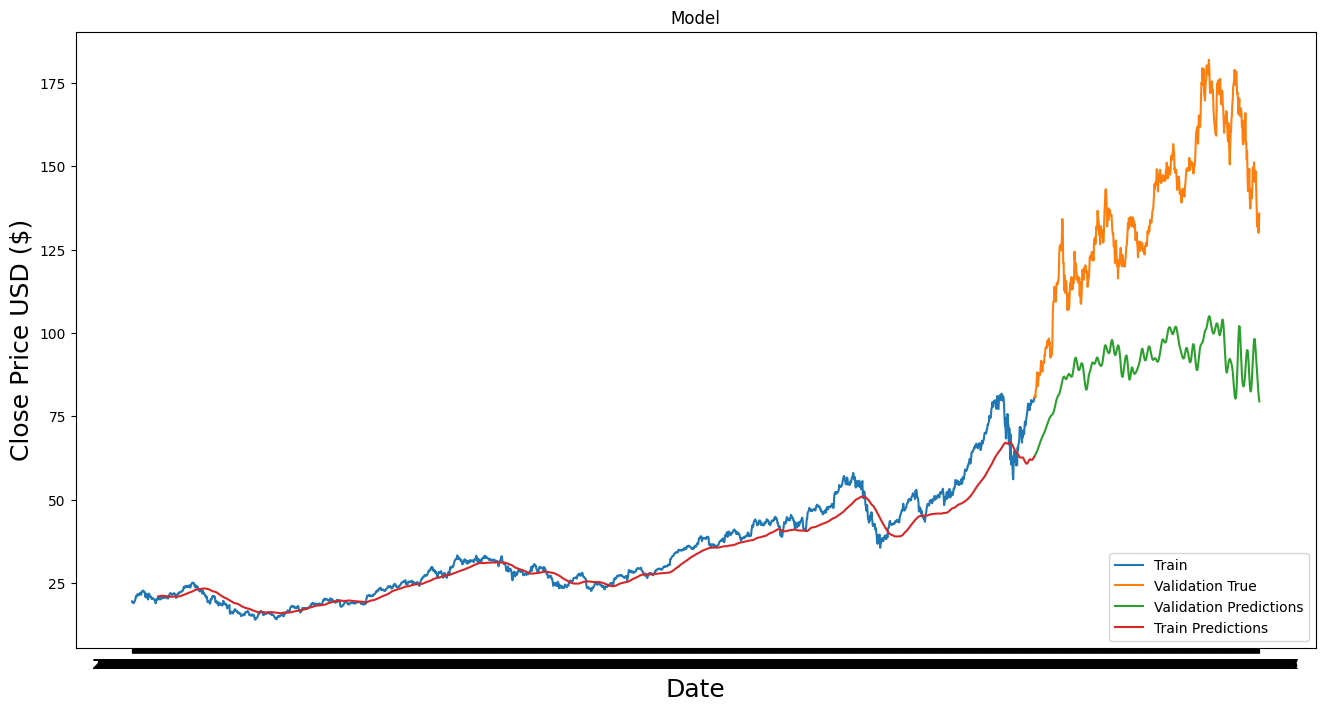

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = lstm_predictions

# Adjusting train_predict to include the relevant range
train_predict = data[60:training_data_len]
train_predict['Predictions'] = lstm_train_predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation true prices
plt.plot(valid['Close'], label='Validation True')

# Plot the validation predictions
plt.plot(valid['Predictions'], label='Validation Predictions')

# Plot the training predictions
plt.plot(train_predict['Predictions'], label='Train Predictions')

# Set the legend with appropriate labels
plt.legend(loc='lower right')

plt.show()
